In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


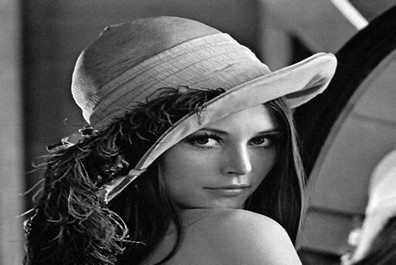

Image Size: Height = 265, Width = 396, Channels = 3
Total Pixels: 104940
Grayscale Image:


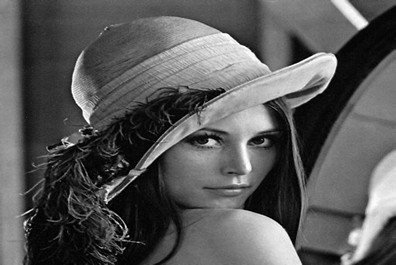

Binary Image:


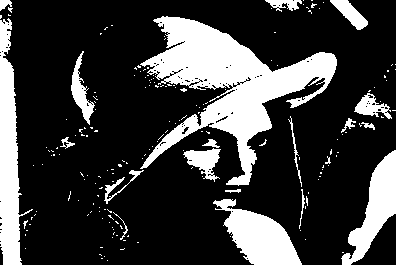

Area of Black Pixels: 79912
Binary Image Size: Height = 265, Width = 396


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Step 1: Read the image
image_path = "/content/drive/MyDrive/example.jpg"
image_bgr = cv2.imread(image_path)

# Step 2: Display the image
cv2_imshow(image_bgr)

# Step 3: Extract the image size
height, width, channels = image_bgr.shape
print(f"Image Size: Height = {height}, Width = {width}, Channels = {channels}")

# Step 4: Calculate the total number of pixels
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

# Step 5: Convert BGR to RGB, then to Grayscale
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite("/content/drive/MyDrive/example_gray.jpg", image_gray)

# Display Grayscale Image
print("Grayscale Image:")
cv2_imshow(image_gray)

# Step 6: Convert Grayscale to Binary Image using a threshold
_, image_binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite("/content/drive/MyDrive/example_binary.jpg", image_binary)

# Display Binary Image
print("Binary Image:")
cv2_imshow(image_binary)

# Count the area of black pixels in the binary image
black_pixels = np.sum(image_binary == 0)
print(f"Area of Black Pixels: {black_pixels}")

# Display the size of the binary image
print(f"Binary Image Size: Height = {image_binary.shape[0]}, Width = {image_binary.shape[1]}")


Original Image:


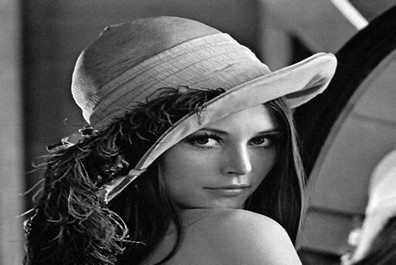

Sobel Edge Detection:


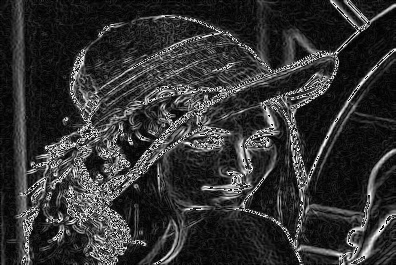

Prewitt Edge Detection:


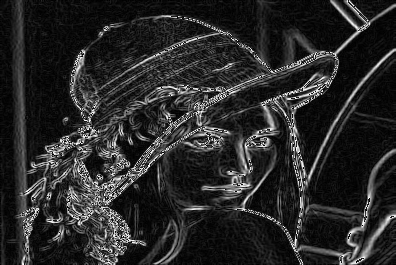

Roberts Cross Edge Detection:


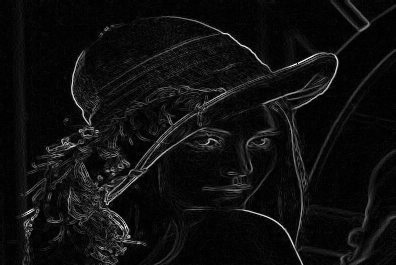

Canny Edge Detection:


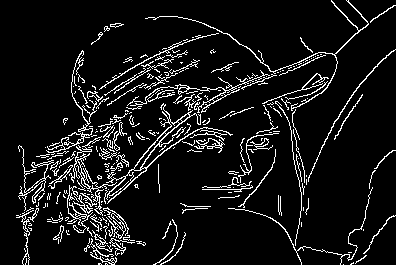

Global Thresholding for Image Segmentation:


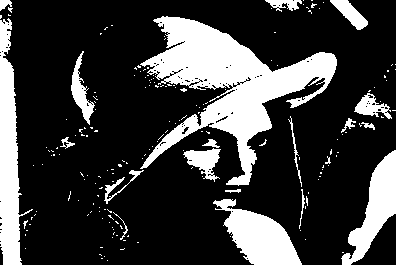

Adaptive Thresholding for Image Segmentation:


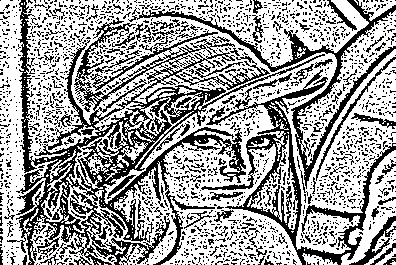

Edge Detection for Segmentation (Canny):


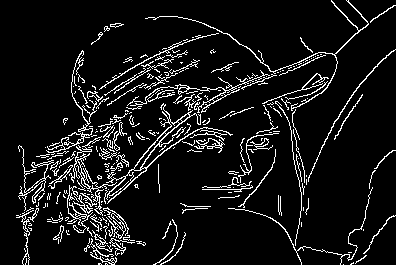

Region-Based Segmentation (Watershed Algorithm):


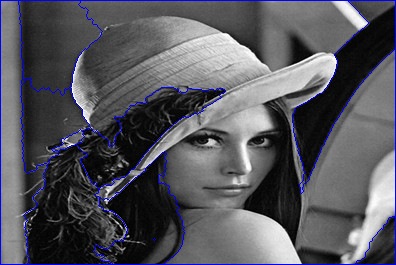

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image_path = "/content/drive/MyDrive/example.jpg"
image_bgr = cv2.imread(image_path)

# The original image
print("Original Image:")
cv2_imshow(image_bgr)

# Task 2: Perform edge detection on the image
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# i. Sobel Operator
print("Sobel Edge Detection:")
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)
sobel_combined = np.uint8(sobel_combined)
cv2_imshow(sobel_combined)

# ii. Prewitt Operator
print("Prewitt Edge Detection:")
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewittx = cv2.filter2D(image_gray, cv2.CV_32F, kernelx)
prewitty = cv2.filter2D(image_gray, cv2.CV_32F, kernely)
prewitt_combined = cv2.magnitude(prewittx, prewitty)
cv2_imshow(np.uint8(prewitt_combined))

# iii. Roberts Cross Operator
print("Roberts Cross Edge Detection:")
roberts_cross_x = np.array([[1, 0], [0, -1]])
roberts_cross_y = np.array([[0, 1], [-1, 0]])
robertsx = cv2.filter2D(image_gray, cv2.CV_32F, roberts_cross_x)
robertsy = cv2.filter2D(image_gray, cv2.CV_32F, roberts_cross_y)
roberts_combined = cv2.magnitude(robertsx, robertsy)
cv2_imshow(np.uint8(roberts_combined))

# iv. Canny Edge Detector
print("Canny Edge Detection:")
canny_edges = cv2.Canny(image_gray, 100, 200)
cv2_imshow(canny_edges)

# Task 3: Perform image segmentation

# i. Global Thresholding for Image Segmentation
print("Global Thresholding for Image Segmentation:")
_, global_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(global_thresh)

# ii. Adaptive Thresholding
print("Adaptive Thresholding for Image Segmentation:")
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2_imshow(adaptive_thresh)

# iii. Edge Detection for Segmentation (Canny Edge Detection)
print("Edge Detection for Segmentation (Canny):")
cv2_imshow(canny_edges)

# iv. Region-Based Segmentation (Watershed Algorithm)
print("Region-Based Segmentation (Watershed Algorithm):")
# Convert to grayscale and apply a threshold
gray_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
_, thresh = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Finding sure background and sure foreground regions
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Watershed Algorithm
markers = cv2.watershed(image_bgr, markers)
image_bgr[markers == -1] = [255, 0, 0]  # Mark boundaries with red
cv2_imshow(image_bgr)
